In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sn
import pickle

newdf = pd.read_excel('Volve production data.xlsx')

In [2]:

newdf = np.round(newdf)

In [3]:

newdf['ON_STREAM_HRS'] = newdf['ON_STREAM_HRS'].fillna(method='pad')

newdf['AVG_DOWNHOLE_PRESSURE'] = newdf['AVG_DOWNHOLE_PRESSURE'].fillna(method='pad')

newdf['AVG_DOWNHOLE_TEMPERATURE'] = newdf['AVG_DOWNHOLE_TEMPERATURE'].fillna(method='pad')

newdf['AVG_DP_TUBING'] = newdf['AVG_DP_TUBING'].fillna(method='pad')

newdf['AVG_ANNULUS_PRESS'] = newdf['AVG_ANNULUS_PRESS'].fillna(method='pad')

newdf['AVG_CHOKE_SIZE_P'] = newdf['AVG_CHOKE_SIZE_P'].fillna(method='pad')

newdf['AVG_WHP_P'] = newdf['AVG_WHP_P'].fillna(method='pad')

newdf['AVG_WHT_P'] = newdf['AVG_WHT_P'].fillna(method='pad')

newdf['DP_CHOKE_SIZE'] = newdf['DP_CHOKE_SIZE'].fillna(method='pad')

newdf['BORE_OIL_VOL'] = newdf['BORE_OIL_VOL'].fillna(method='pad')

newdf['BORE_GAS_VOL'] = newdf['BORE_GAS_VOL'].fillna(method='pad')

newdf['BORE_WAT_VOL'] = newdf['BORE_WAT_VOL'].fillna(method='pad')


C:\Users\user\AppData\Local\Temp\ipykernel_7940\2228129702.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  newdf['ON_STREAM_HRS'] = newdf['ON_STREAM_HRS'].fillna(method='pad')
C:\Users\user\AppData\Local\Temp\ipykernel_7940\2228129702.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  newdf['AVG_DOWNHOLE_PRESSURE'] = newdf['AVG_DOWNHOLE_PRESSURE'].fillna(method='pad')
C:\Users\user\AppData\Local\Temp\ipykernel_7940\2228129702.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  newdf['AVG_DOWNHOLE_TEMPERATURE'] = newdf['AVG_DOWNHOLE_TEMPERATURE'].fillna(method='pad')
C:\Users\user\AppData\Local\Temp\ipykernel_7940\2228129702.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future versio

In [4]:

to_drop = ["WELL_BORE_CODE", "NPD_WELL_BORE_NAME", "NPD_FIELD_NAME", "NPD_FIELD_CODE", "NPD_FACILITY_CODE", "NPD_FACILITY_NAME","AVG_DOWNHOLE_PRESSURE", "AVG_DP_TUBING","BORE_WI_VOL","AVG_CHOKE_UOM","FLOW_KIND","WELL_TYPE","BORE_GAS_VOL"]
newdf = newdf.drop(to_drop, axis=1)
print(newdf.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   NPD_WELL_BORE_CODE        15634 non-null  int64         
 2   ON_STREAM_HRS             15634 non-null  float64       
 3   AVG_DOWNHOLE_TEMPERATURE  15634 non-null  float64       
 4   AVG_ANNULUS_PRESS         15634 non-null  float64       
 5   AVG_CHOKE_SIZE_P          15634 non-null  float64       
 6   AVG_WHP_P                 15634 non-null  float64       
 7   AVG_WHT_P                 15634 non-null  float64       
 8   DP_CHOKE_SIZE             15634 non-null  float64       
 9   BORE_OIL_VOL              15634 non-null  float64       
 10  BORE_WAT_VOL              15634 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB
None


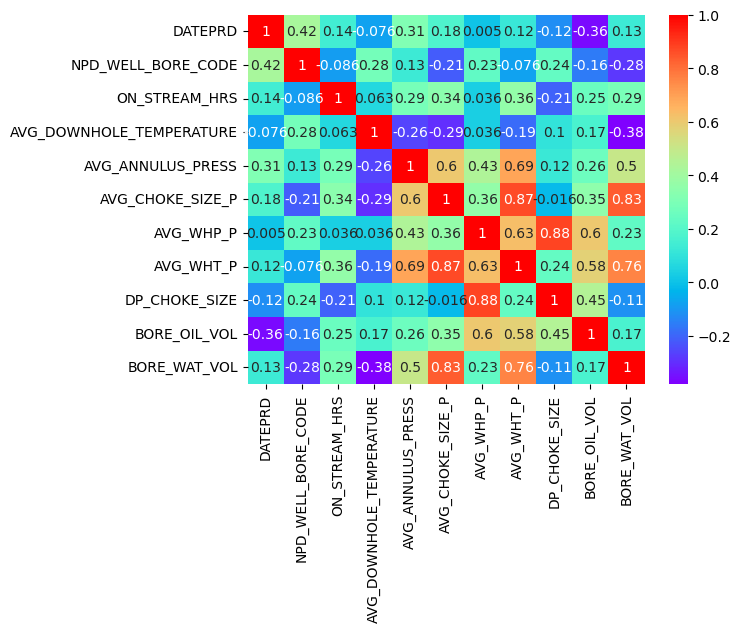

In [5]:

dataplot = sn.heatmap(newdf.corr(numeric_only=False), cmap="rainbow", annot= True)
  
# displaying heatmap
plt.show()

In [6]:
#Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

newdf[['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS','AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P']] = scaler.fit_transform(newdf[['ON_STREAM_HRS', 'AVG_DOWNHOLE_TEMPERATURE','AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P','AVG_WHP_P', 'AVG_WHT_P']])


#Taking the data of wells 2 to 4 since they were the ones with the least number of missing values
fdf = newdf.loc[746 : 8022]

X = fdf.drop(['BORE_OIL_VOL'],axis=1)
y= fdf[['BORE_OIL_VOL','NPD_WELL_BORE_CODE']]

#Applying Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

reg_all = LinearRegression()

In [7]:
x_train_final = X_train.drop(['DATEPRD','NPD_WELL_BORE_CODE'],axis = 1)
x_test_final = X_test.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

In [8]:
y_test_final = y_test['BORE_OIL_VOL']
y_train_final = y_train['BORE_OIL_VOL']

In [9]:
X = fdf.drop(['DATEPRD','BORE_OIL_VOL'],axis=1).values
y= fdf['BORE_OIL_VOL']

In [10]:
x_train_final

,ON_STREAM_HRS,AVG_DOWNHOLE_TEMPERATURE,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_WAT_VOL
3374,0.96,0.000000,0.433333,1.00,0.248175,0.978723,5.0,4663.0
3760,0.96,0.000000,0.500000,1.00,0.240876,0.968085,4.0,4630.0
2900,0.96,0.000000,0.766667,0.56,0.350365,0.936170,16.0,3784.0
2090,0.96,0.972477,0.400000,0.50,0.605839,0.840426,49.0,7.0
7782,0.96,0.917431,0.466667,0.94,0.211679,0.925532,2.0,3346.0
...,...,...,...,...,...,...,...,...
5937,0.96,0.972477,0.000000,0.62,0.335766,0.968085,13.0,3374.0
5972,0.96,0.972477,0.000000,1.00,0.299270,0.957447,9.0,3359.0
6136,0.92,0.954128,0.000000,0.57,0.306569,0.946809,12.0,4301.0
1606,0.96,0.972477,0.366667,1.00,0.233577,0.861702,5.0,2145.0


In [11]:
reg_all.fit(x_train_final, y_train_final)

LinearRegression()

In [12]:
y_pred = reg_all.predict(x_test_final)

In [13]:
print("The R2 value for linear regression for oil volume production is", reg_all.score(x_test_final, y_test_final))

The R2 value for linear regression for oil volume production is 0.5542109655694197


In [14]:
importance = reg_all.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 1338.07639
Feature: 1, Score: 280.89200
Feature: 2, Score: -1194.43707
Feature: 3, Score: 48.02134
Feature: 4, Score: 506.57085
Feature: 5, Score: 2572.30477
Feature: 6, Score: 13.05541
Feature: 7, Score: -0.40973


In [15]:
reg_all.coef_

array([ 1.33807639e+03,  2.80892004e+02, -1.19443707e+03,  4.80213352e+01,
        5.06570847e+02,  2.57230477e+03,  1.30554129e+01, -4.09730530e-01])

In [16]:
reg_all.intercept_

-1110.702698660846

### Correlation from Linear Regression

In [17]:
print("The Correlation from linear model is: BORE_OIL_VOL = {:.5} + {:.5}*ON_STREAM_HRS + {:.5}*AVG_DOWNHOLE_TEMPERATURE  {:.5}*AVG_ANNULUS_PRESS + {:.5}*AVG_CHOKE_SIZE_P + {:.5}*AVG_WHP_P + {:.5}*AVG_WHT_P + {:.5}*DP_CHOKE_SIZE {:.5}*BORE_WAT_".format(reg_all.intercept_, reg_all.coef_[0], reg_all.coef_[1], reg_all.coef_[2],reg_all.coef_[3], reg_all.coef_[4], reg_all.coef_[5], reg_all.coef_[6], reg_all.coef_[7]))

The Correlation from linear model is: BORE_OIL_VOL = -1110.7 + 1338.1*ON_STREAM_HRS + 280.89*AVG_DOWNHOLE_TEMPERATURE  -1194.4*AVG_ANNULUS_PRESS + 48.021*AVG_CHOKE_SIZE_P + 506.57*AVG_WHP_P + 2572.3*AVG_WHT_P + 13.055*DP_CHOKE_SIZE -0.40973*BORE_WAT_


### Polynomial

In [18]:
# Applying Polynomisl Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train_final)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train_final)
x_pol_test = poly_reg.fit_transform(x_test_final)
X_poly.shape[1]



print("The R2 value for Ridge regression for oil volume production is",lin_reg.score(x_pol_test, y_test_final))

The R2 value for Ridge regression for oil volume production is 0.9572677127294036


In [19]:
a =np.array(poly_reg.get_feature_names_out(['ON_STREAM_HRS','AVG_DOWNHOLE_TEMPERATURE', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P','AVG_WHP_P','AVG_WHT_P','DP_CHOKE_SIZE' ,'BORE_WAT_VOL']))

In [20]:
print(len(a))

495


In [21]:
b = np.array(lin_reg.coef_)

In [22]:
Correlation_Poly = pd.DataFrame({'Coefficients':b, 'Feature Name':a})

In [23]:
pd.set_option('display.max_rows',30)

In [24]:
Correlation_Poly.head(30)

,Coefficients,Feature Name
0,51.272236,1
1,98.312136,ON_STREAM_HRS
2,-2.268094,AVG_DOWNHOLE_TEMPERATURE
3,-33.306440,AVG_ANNULUS_PRESS
4,75.994927,AVG_CHOKE_SIZE_P
5,21.827586,AVG_WHP_P
6,49.877757,AVG_WHT_P
7,-15.096760,DP_CHOKE_SIZE
8,24.140095,BORE_WAT_VOL
9,89.849271,ON_STREAM_HRS^2


In [25]:
# get importance
importance = lin_reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 51.27224
Feature: 1, Score: 98.31214
Feature: 2, Score: -2.26809
Feature: 3, Score: -33.30644
Feature: 4, Score: 75.99493
Feature: 5, Score: 21.82759
Feature: 6, Score: 49.87776
Feature: 7, Score: -15.09676
Feature: 8, Score: 24.14009
Feature: 9, Score: 89.84927
Feature: 10, Score: 45.14038
Feature: 11, Score: 32.17981
Feature: 12, Score: 92.25645
Feature: 13, Score: 15.62979
Feature: 14, Score: 59.31852
Feature: 15, Score: 10.67192
Feature: 16, Score: -17.55559
Feature: 17, Score: -14.04028
Feature: 18, Score: -25.09581
Feature: 19, Score: 31.53587
Feature: 20, Score: -3.99209
Feature: 21, Score: -15.56662
Feature: 22, Score: 57.51739
Feature: 23, Score: -17.39006
Feature: 24, Score: -57.29987
Feature: 25, Score: 31.01790
Feature: 26, Score: 0.31198
Feature: 27, Score: -14.12295
Feature: 28, Score: 70.95471
Feature: 29, Score: -7.31532
Feature: 30, Score: 72.43979
Feature: 31, Score: 19.13292
Feature: 32, Score: 71.81763
Feature: 33, Score: -7.77017
Feature: 34, Sco

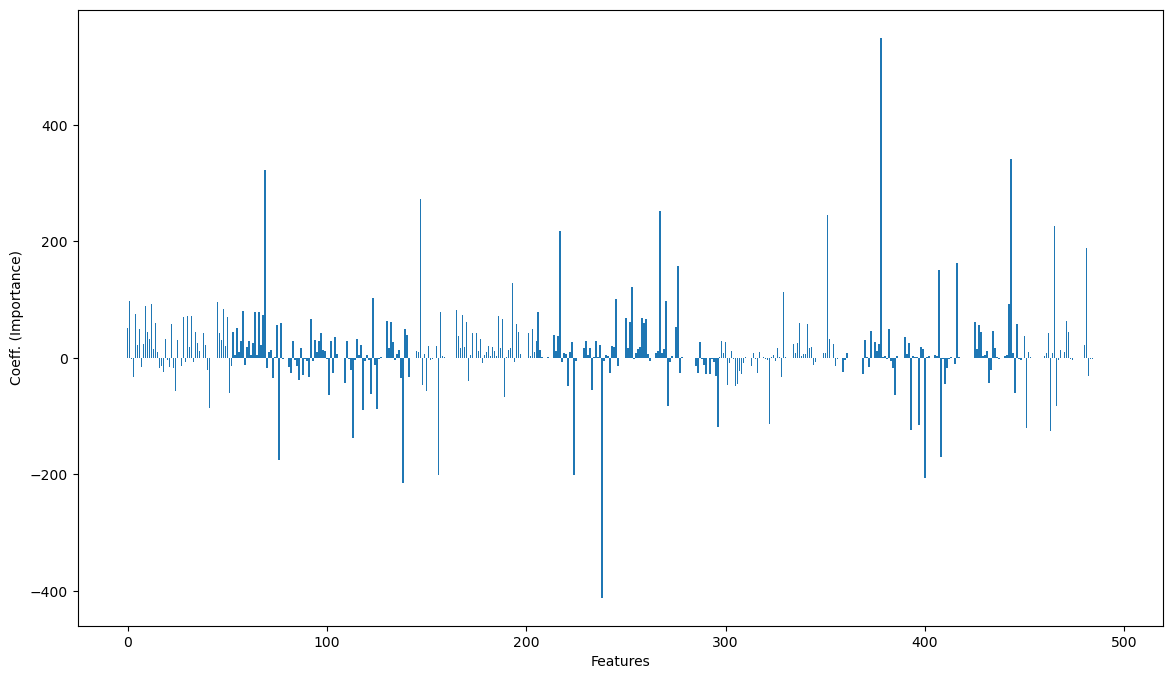

In [26]:
# plot feature importance
plt.figure(figsize = (14,8))
plt.xlabel("Features")
plt.ylabel("Coeff. (Importance)")
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [27]:
y_pred = lin_reg.predict(x_pol_test)

In [28]:
print("The R2 value for Polynomial regression(4th order) for oil volume production is",lin_reg.score(x_pol_test, y_test_final))

The R2 value for Polynomial regression(4th order) for oil volume production is 0.9572677127294036


In [29]:
df = pd.DataFrame({'Real Values':y_test_final, 'Predicted Values':y_pred})
df.head(50)

,Real Values,Predicted Values
6805,643.0,494.551610
6756,613.0,230.907763
5221,4634.0,4416.488183
4435,688.0,651.846172
5261,3571.0,3576.853894
...,...,...
6176,928.0,1597.373273
4404,719.0,617.061145
4942,0.0,-104.375574
3628,575.0,506.797480


In [30]:
X_test.groupby(['NPD_WELL_BORE_CODE']).agg({"DATEPRD":"count"})

,DATEPRD
NPD_WELL_BORE_CODE,
5351,910
5599,914
7078,360


## Actual V/S Model Prediction plot for Well No.- 5599

### Linear Regression

The R2 value for linear regression for oil volume production in well 5599 is 0.5500832938872098


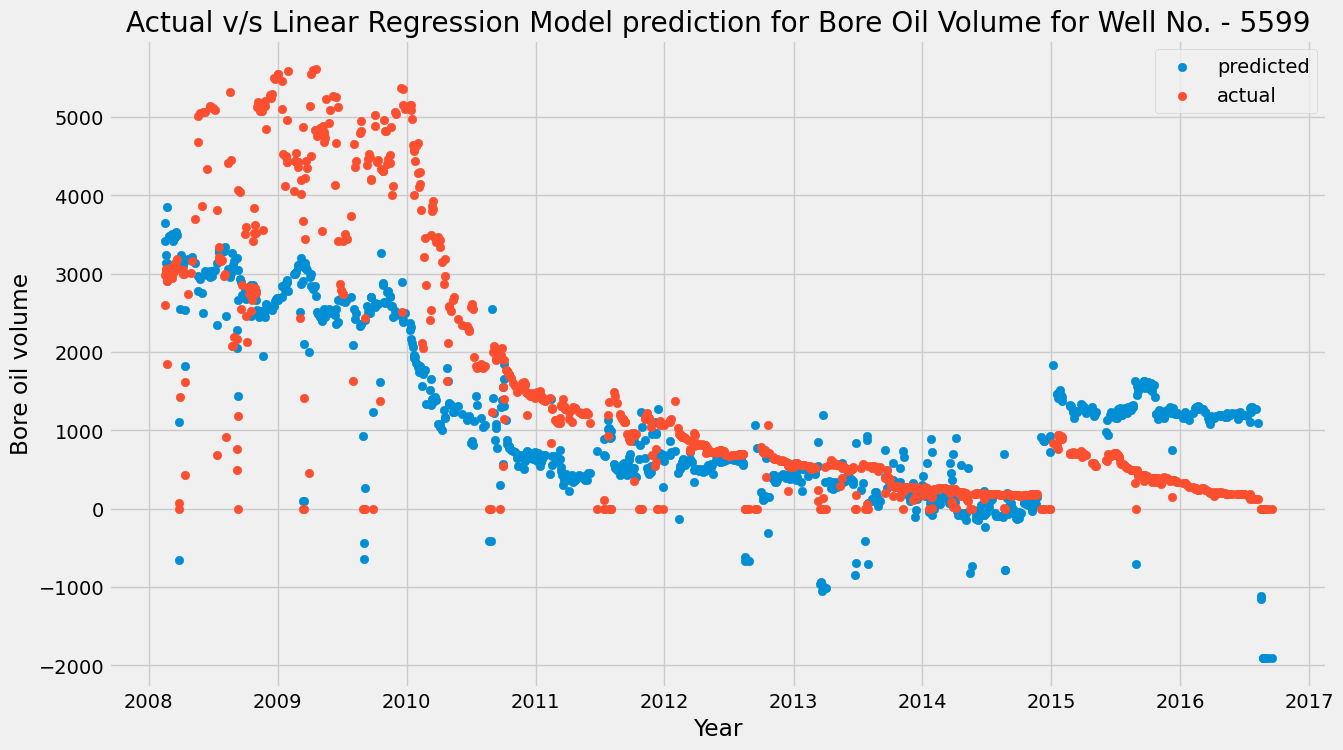

In [31]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = reg_all.predict(x_test_5599final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5599')

y_test_5599_final = y_test_5599['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production in well 5599 is", reg_all.score(x_test_5599final,y_test_5599_final ))


In [32]:
print("The linear model is: BORE_OIL_VOL = {:.5} + {:.5}*ON_STREAM_HRS + {:.5}*AVG_DOWNHOLE_TEMPERATURE  {:.5}*AVG_ANNULUS_PRESS + {:.5}*AVG_CHOKE_SIZE_P + {:.5}*AVG_WHP_P + {:.5}*AVG_WHT_P + {:.5}*DP_CHOKE_SIZE {:.5}*BORE_WAT_".format(reg_all.intercept_, reg_all.coef_[0], reg_all.coef_[1], reg_all.coef_[2],reg_all.coef_[3], reg_all.coef_[4], reg_all.coef_[5], reg_all.coef_[6], reg_all.coef_[7]))

The linear model is: BORE_OIL_VOL = -1110.7 + 1338.1*ON_STREAM_HRS + 280.89*AVG_DOWNHOLE_TEMPERATURE  -1194.4*AVG_ANNULUS_PRESS + 48.021*AVG_CHOKE_SIZE_P + 506.57*AVG_WHP_P + 2572.3*AVG_WHT_P + 13.055*DP_CHOKE_SIZE -0.40973*BORE_WAT_


The R2 value for linear regression for oil volume production in well 5599 is 0.5500832938872098
The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5599 is 0.9691389819491184


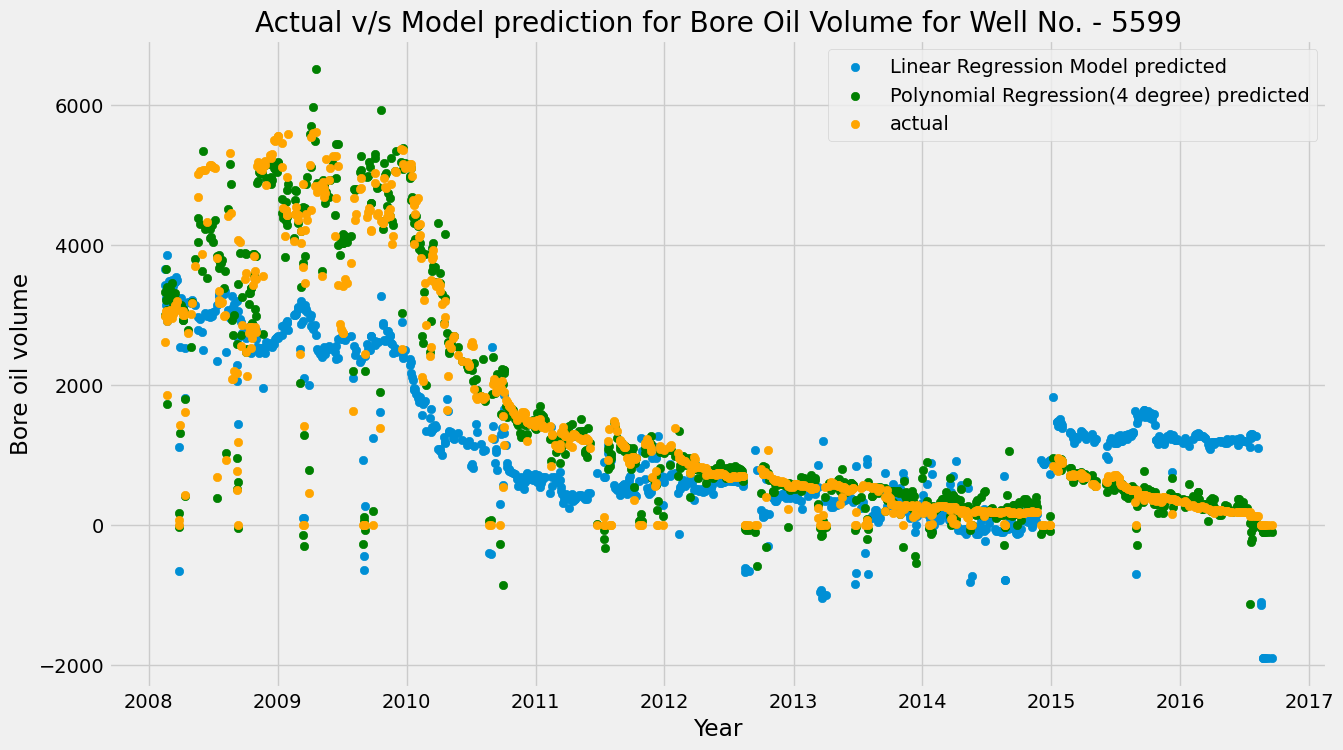

In [33]:
X_test_5599 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5599]

y_test_5599 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5599]

x_test_5599final = X_test_5599.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_5599final)


x_pol_test_5599 = poly_reg.fit_transform(x_test_5599final)
y_poly = lin_reg.predict(x_pol_test_5599)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_poly,label='Polynomial Regression(4 degree) predicted', color = 'green')
plt.scatter(X_test_5599["DATEPRD"].tolist(),y_test_5599['BORE_OIL_VOL'],label='actual', color = 'orange')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 5599')

print("The R2 value for linear regression for oil volume production in well 5599 is", reg_all.score(x_test_5599final,y_test_5599_final ))

print("The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5599 is", lin_reg.score(x_pol_test_5599,y_test_5599_final ))



## Actual V/S Model Prediction plot for Well No.- 5351

### Linear Regression

The R2 value for linear regression for oil volume production is 0.6750225210254919


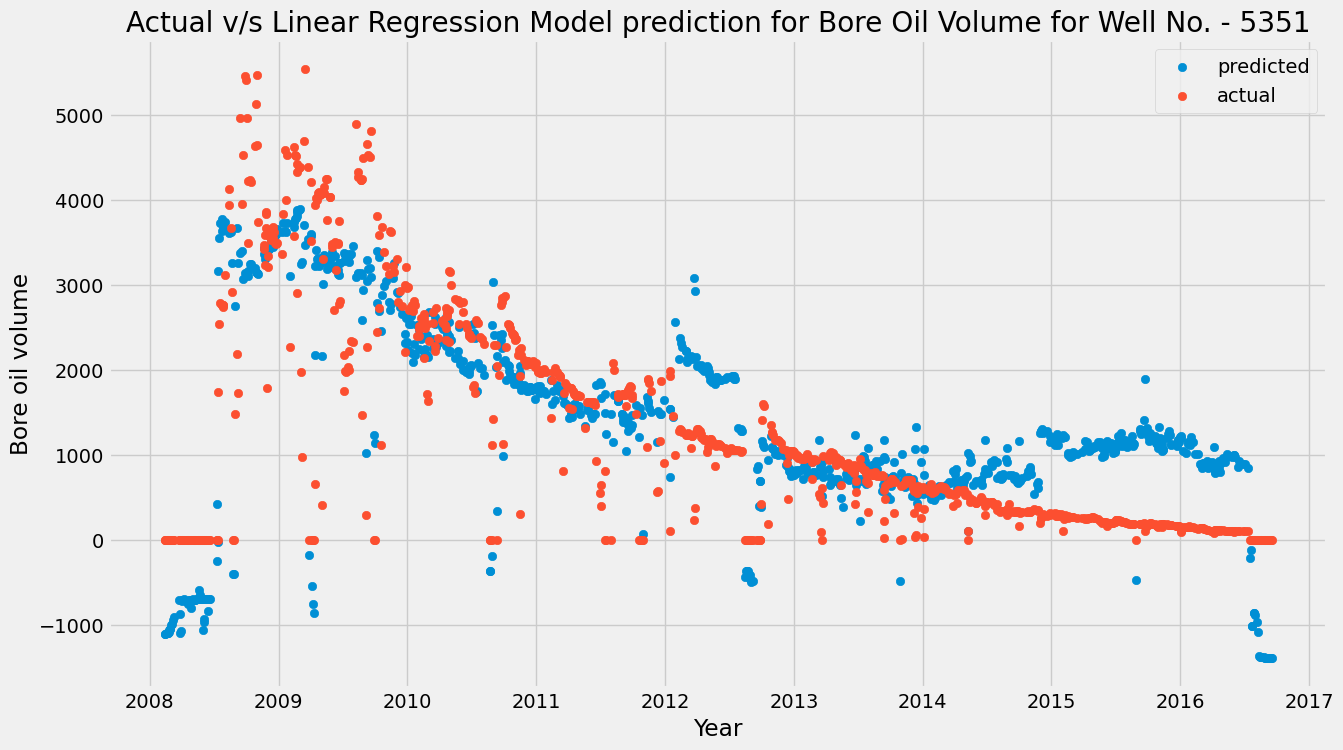

In [34]:
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = reg_all.predict(x_test_5351final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 5351')

y_test_5351_final = y_test_5351['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production is", reg_all.score(x_test_5351final,y_test_5351_final ))


The R2 value for linear regression for oil volume production in well 5351 is 0.6750225210254919
The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5351 is 0.9475671886429053


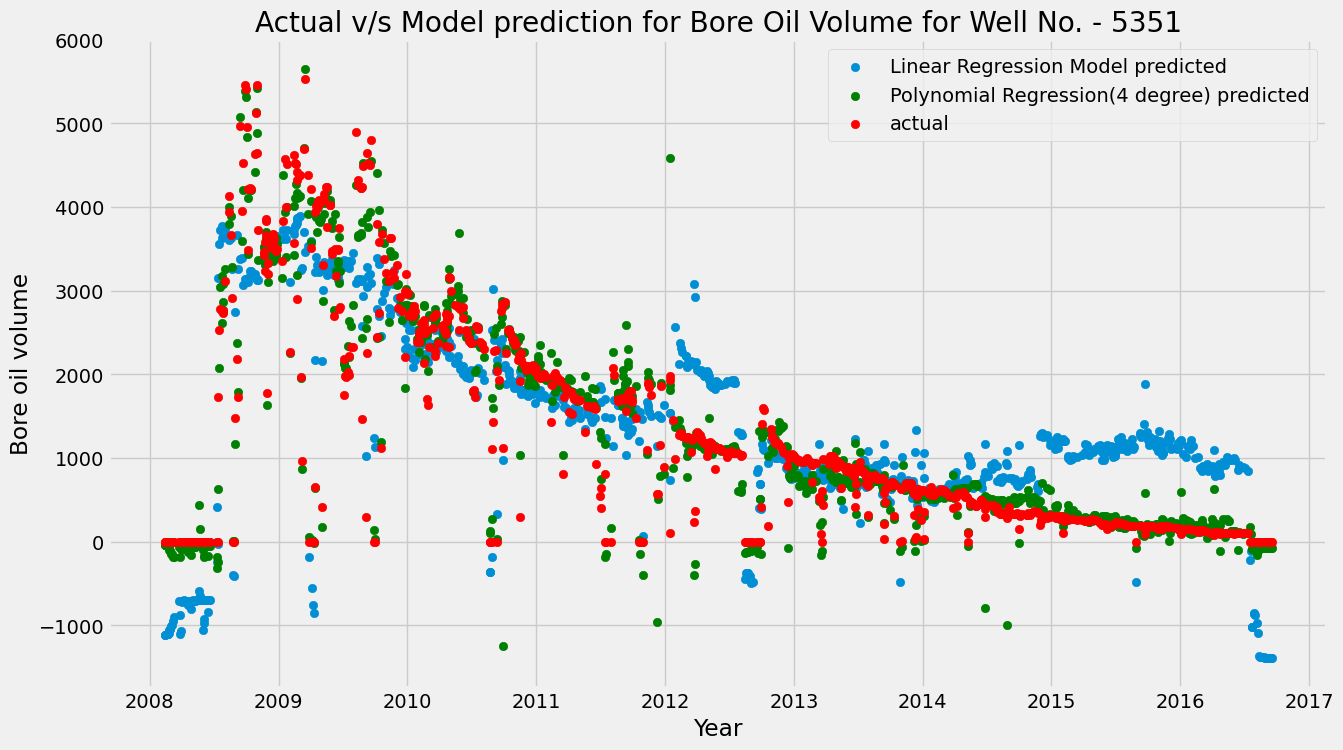

In [35]:
X_test_5351 = X_test[X_test["NPD_WELL_BORE_CODE"] == 5351]

y_test_5351 = y_test[y_test["NPD_WELL_BORE_CODE"] == 5351]

x_test_5351final = X_test_5351.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_5351final)


x_pol_test_5351 = poly_reg.fit_transform(x_test_5351final)
y_poly = lin_reg.predict(x_pol_test_5351)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_poly,label='Polynomial Regression(4 degree) predicted', color = 'green')
plt.scatter(X_test_5351["DATEPRD"].tolist(),y_test_5351['BORE_OIL_VOL'],label='actual', color = 'red')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 5351')

print("The R2 value for linear regression for oil volume production in well 5351 is", reg_all.score(x_test_5351final,y_test_5351_final ))

print("The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 5351 is", lin_reg.score(x_pol_test_5351,y_test_5351_final ))


## Actual V/S Model Prediction plot for Well No.- 7078

### Linear Regression

The R2 value for linear regression for oil volume production in well 7078 is -3.0140537511268564


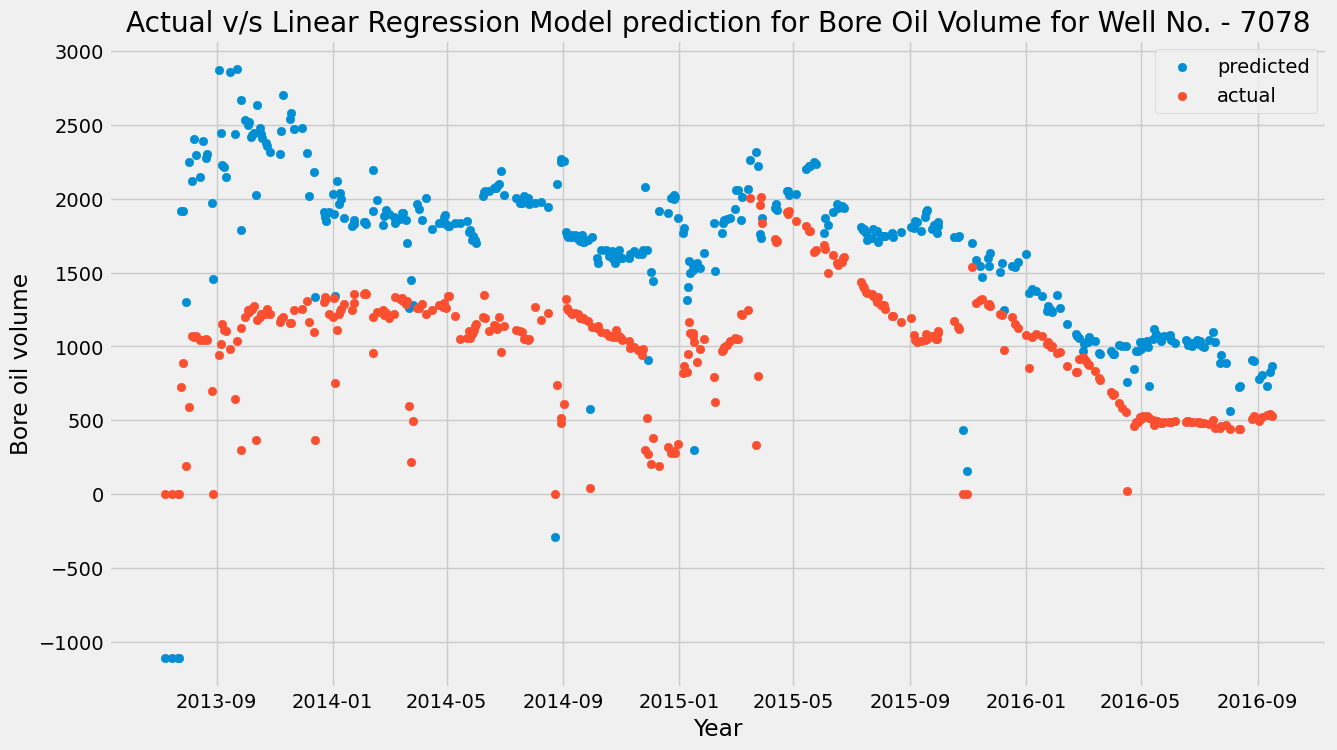

In [36]:
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]

y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)


y_pred = reg_all.predict(x_test_7078final)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_pred,label='predicted')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_test_7078['BORE_OIL_VOL'],label='actual')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Linear Regression Model prediction for Bore Oil Volume for Well No. - 7078')

y_test_7078_final = y_test_7078['BORE_OIL_VOL']
print("The R2 value for linear regression for oil volume production in well 7078 is", reg_all.score(x_test_7078final,y_test_7078_final ))


The R2 value for linear regression for oil volume production in well 7078 is -3.0140537511268564
The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 7078 is 0.6541672406806815


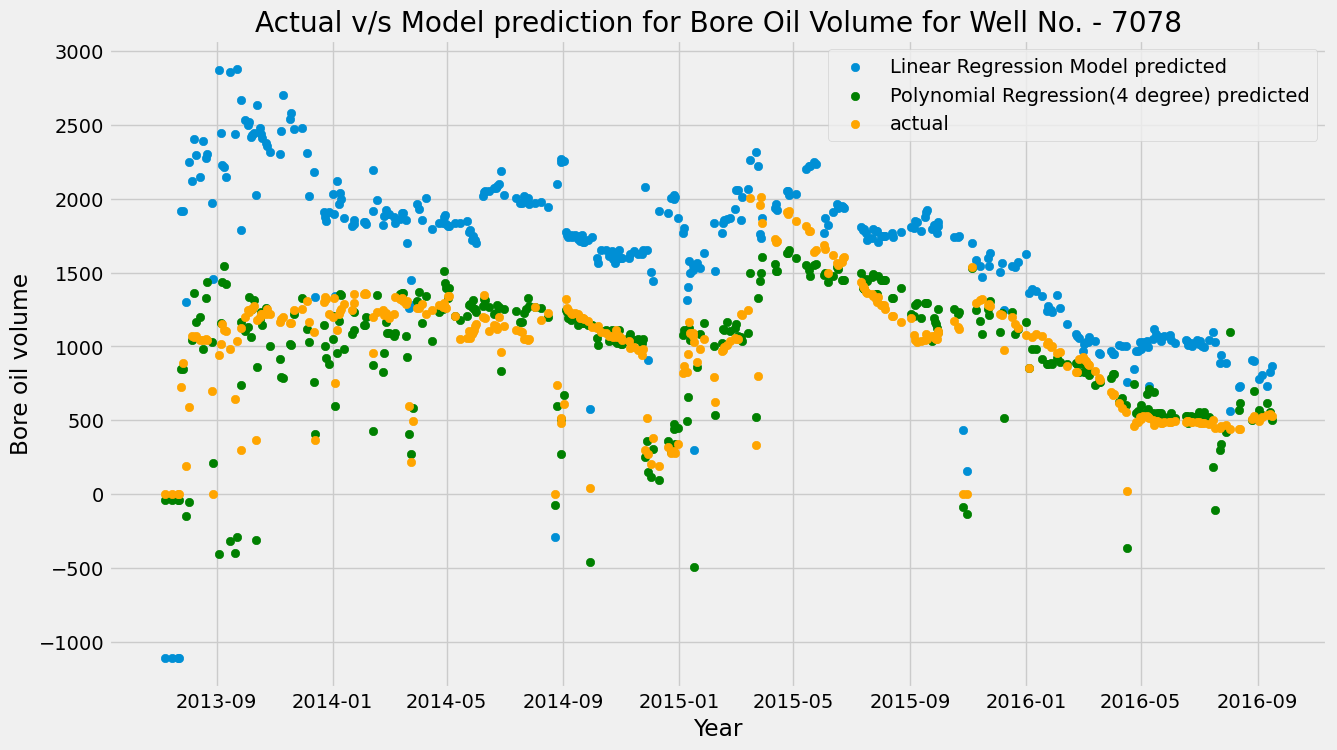

In [37]:
X_test_7078 = X_test[X_test["NPD_WELL_BORE_CODE"] == 7078]

y_test_7078 = y_test[y_test["NPD_WELL_BORE_CODE"] == 7078]

x_test_7078final = X_test_7078.drop(['DATEPRD',"NPD_WELL_BORE_CODE"],axis = 1)

y_linear = reg_all.predict(x_test_7078final)


x_pol_test_7078 = poly_reg.fit_transform(x_test_7078final)
y_poly = lin_reg.predict(x_pol_test_7078)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_linear,label='Linear Regression Model predicted')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_poly,label='Polynomial Regression(4 degree) predicted', color = 'green')
plt.scatter(X_test_7078["DATEPRD"].tolist(),y_test_7078['BORE_OIL_VOL'],label='actual', color = 'orange')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Bore oil volume")
plt.title('Actual v/s Model prediction for Bore Oil Volume for Well No. - 7078')

print("The R2 value for linear regression for oil volume production in well 7078 is", reg_all.score(x_test_7078final,y_test_7078_final ))

print("The R2 value for Polynomial regression(Degree - 4) for oil volume production in well 7078 is", lin_reg.score(x_pol_test_7078,y_test_7078_final ))


## Neural Networks model

In [38]:

from tensorflow.keras.models import Sequential
model = Sequential()

In [39]:
x_train_final.shape


(5093, 8)

In [40]:
from tensorflow.keras.layers import Dense
number_inputs = x_train_final.shape[1]
number_hidden_nodes = 100

model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))
model.add(Dense(number_hidden_nodes, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# from keras.callbacks import EarlyStopping
# from keras import backend as K  # Correct import for Keras backend
# def rmse(y_true, y_pred):
#     from keras import backend
#     return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# # mean squared error (mse) for regression  (only for Keras tensors)
# def mse(y_true, y_pred):
#     from keras import backend
#     return backend.mean(backend.square(y_pred - y_true), axis=-1)

# # coefficient of determination (R^2) for regression  (only for Keras tensors)
# def r_square(y_true, y_pred):
#     from keras import backend as K
#     SS_res =  K.sum(K.square(y_true - y_pred)) 
#     SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
#     return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [48]:
from keras import losses

model.compile(loss="mean_absolute_error",
              optimizer="adam", metrics=[r_square, rmse])

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,101 (43.36 KB)

 Trainable params: 11,101 (43.36 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
from keras.callbacks import EarlyStopping
es= EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10,verbose=0, mode='min')
model.fit(
    x_train_final,
    y_train_final,
    epochs=100,
    shuffle=True,
    verbose=2,
    validation_split= .15,
    callbacks= [es]
)

Epoch 1/100


AttributeError: 'NoneType' object has no attribute 'items'